# Exploratory Data Analysis - Lending Club Case Study
## Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

    . If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
    . If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead 
    to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc

When a person applies for a loan, there are two types of decisions that could be taken by the company:

    Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. 
             These candidates are not labelled as 'defaulted'.

    Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has 
                defaulted on the loan 

    Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). 
                   Since the loan was rejected, there is no transactional history of those applicants with the company 
                   and so this data is not available with the company (and thus in this dataset)
## Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Import Packages

In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime

In [572]:
df = pd.read_csv("loan\loan.csv")

In [573]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [574]:
df.shape

(39717, 111)

In [575]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

## Data Cleaning

#### Check Missing Value percentages for every column

In [576]:
nullcols = round((df.isnull().sum()/len(df))*100,2).sort_values()
nullcols

id                              0.0
earliest_cr_line                0.0
inq_last_6mths                  0.0
open_acc                        0.0
pub_rec                         0.0
                              ...  
avg_cur_bal                   100.0
bc_open_to_buy                100.0
bc_util                       100.0
mo_sin_old_rev_tl_op          100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [577]:
len(nullcols[nullcols>30])

58

#### We observe there are 58 columns with more than 30 percent nulls. Hence we will drop such columns as they wont help in analysis

Drop columns greater than 30 percent null values.

In [578]:
perc = 30
min_count = int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna(axis=1, thresh=min_count)

In [579]:
df.shape

(39717, 53)

In [580]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#### Next let's check the columns having only single values. We can get rid of those as they will not add any value to our analysis.

In [581]:
singleValuedCols=[]
for col in df.columns:
    if df[col].nunique()==1:
        singleValuedCols.append(col)

In [582]:
print(singleValuedCols)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [583]:
df.drop(singleValuedCols, axis='columns', inplace=True)

#### id, member_id and url are unique to every record. ID and member_id are randomly generated by system and url is same for all with unique loan id's. Hence can be dropped off.

In [584]:
df.drop(['id','member_id','url'], axis='columns', inplace=True)

#### ZIP Codes are incomplete with XX. Also, we have a another column with state details. So let's drop zip_code.

In [585]:
df.drop(['zip_code'], axis='columns', inplace=True)

#### Title and Emp Title have a very huge number of categories. Hence let's drop it as it wont add to our analysis.

In [586]:
df.drop(['title', 'emp_title'], axis='columns', inplace=True)

#### 'funded_amnt_inv','funded_amnt' can be dropped off as we are going to consider loan_amnt as our target variable. Only loan_amnt is available at the time of application. 'funded_amnt_inv','funded_amnt' are populated only after the loan is processed. Hence can be dropped off. 

In [587]:
df.drop(['funded_amnt_inv','funded_amnt'], axis='columns', inplace=True)

#### Below are customer behavioral data and not available at the time of loan application. Hence dropped off.

In [588]:
df.drop(['delinq_2yrs','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 
        'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','earliest_cr_line',
        'inq_last_6mths', 'revol_bal', 'revol_util','total_acc', 'out_prncp','out_prncp_inv','open_acc','pub_rec'], 
        axis='columns', inplace=True)

#### Finally left with below columns to proceed with our analysis.

In [589]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')

#### Rows with loan_status = Current can be dropped off as these are the loans with are still in progress. We are not sure of their outcome if they will be fully paid or get charged off in between.
#### Then check for any duplicate rows. If present then delete those.
#### Finally will have a check if there are any rows with multiple missing columns.

In [590]:
df=df[~(df["loan_status"]=="Current")]

In [591]:
df=df.drop_duplicates()

In [592]:
df[df.isnull().sum(axis=1)>1]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies


In [593]:
df.shape

(38577, 16)

In [594]:
column_unique = df.nunique()
print(column_unique)

loan_amnt                 870
term                        2
int_rate                  370
installment             15022
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              5
annual_inc               5215
verification_status         3
issue_d                    55
loan_status                 2
purpose                    14
addr_state                 50
dti                      2853
pub_rec_bankruptcies        3
dtype: int64


### Find Missing Value Percentages Columnwise

In [595]:
nullcols = round((df.isnull().sum()/len(df))*100,2).sort_values()
nullcols[nullcols>0]

pub_rec_bankruptcies    1.81
emp_length              2.68
dtype: float64

### Missing Value Treatment

    For quantitative/numerical variables we can either impute with mean/median. Mean where there are no outliers and median incase outliers are present.
    For categorical ones mode imputation is done.

    Imputation can lead to biased analysis hence we can also drop such records.

In our case, pub_rec_bankruptcies & emp_length will be imputed with another category as missing. As by this way, we wont loose and records also avoid adding biasness.

In [596]:
df=df.fillna("Missing")

In [597]:
nullcols = round((df.isnull().sum()/len(df))*100,2).sort_values()
nullcols[nullcols>0]

Series([], dtype: float64)

In [598]:
df.shape

(38577, 16)

#### Columnwise Data Check

In [599]:
df["loan_amnt"].value_counts()

10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
13950       1
29175       1
13025       1
19150       1
28750       1
Name: loan_amnt, Length: 870, dtype: int64

In [600]:
df["term"].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [601]:
df["int_rate"].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
22.94%      1
24.40%      1
22.64%      1
17.46%      1
20.52%      1
Name: int_rate, Length: 370, dtype: int64

In [602]:
df["installment"].nunique()

15022

In [603]:
df["grade"].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [604]:
df["sub_grade"].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [605]:
df["emp_length"].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Missing      1033
Name: emp_length, dtype: int64

In [606]:
df["home_ownership"].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [607]:
df["annual_inc"].value_counts()

60000.0    1466
50000.0    1029
40000.0     855
45000.0     811
30000.0     808
           ... 
34977.0       1
51360.0       1
69950.0       1
55454.0       1
90111.0       1
Name: annual_inc, Length: 5215, dtype: int64

In [608]:
df["verification_status"].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [609]:
df["issue_d"].value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [610]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [611]:
df["purpose"].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [612]:
df["addr_state"].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
OR     435
AL     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
HI     166
NH     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: addr_state, dtype: int64

In [613]:
df["dti"].value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
29.57      1
29.01      1
27.80      1
28.83      1
28.04      1
Name: dti, Length: 2853, dtype: int64

In [614]:
df["pub_rec_bankruptcies"].value_counts()

0.0        36238
1.0         1637
Missing      697
2.0            5
Name: pub_rec_bankruptcies, dtype: int64

In [615]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')

In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_length            38577 non-null  object 
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  addr_state            38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  pub_rec_bankruptcie

### Column Understanding/Seggregation

#### 1. Target Variable -  'loan_status'
#### 2. Numerical/Quantitative Variables.
        loan_amnt
        annual_inc
        dti
        installment
#### 3. Categorical Variables.
        int_rate
        term
        grade
        emp_length
        home_ownership
        verification_status
        purpose
        addr_state
        pub_rec_bankruptcies

#### int_rate column cleaning
    . Strip the %
    . Convert it into float datatype
    . Round off to create categories.

In [617]:
df["int_rate"] = df["int_rate"].apply(lambda x:x.strip("%")).astype(float)

In [618]:
df['int_rate_cat'] = round(df["int_rate"])

In [619]:
df.nunique()

loan_amnt                 870
term                        2
int_rate                  370
installment             15022
grade                       7
sub_grade                  35
emp_length                 12
home_ownership              5
annual_inc               5215
verification_status         3
issue_d                    55
loan_status                 2
purpose                    14
addr_state                 50
dti                      2853
pub_rec_bankruptcies        4
int_rate_cat               20
dtype: int64

#### emp_length column cleaning

In [620]:
emp_length_dict = {
    '< 1 year' : "0",
    '1 year' : "1",
    '2 years' : "2",
    '3 years' : "3",
    '4 years' : "4",
    '5 years' : "5",
    '6 years' : "6",
    '7 years' : "7",
    '8 years' : "8",
    '9 years' : "9",
    '10+ years' : "10",
    'Missing' : 'Missing'
}

In [621]:
df['emp_length'] = df['emp_length'].apply(lambda x:emp_length_dict.get(x))

In [622]:
df['emp_length'].value_counts()

10         8488
0          4508
2          4291
3          4012
4          3342
5          3194
1          3169
6          2168
7          1711
8          1435
9          1226
Missing    1033
Name: emp_length, dtype: int64

#### issue_d - Derived columns issue_month and issue_year

In [623]:
df['issue_d'] = df['issue_d'].apply(lambda x:datetime.datetime.strptime(x,'%b-%y'))

In [624]:
df['issue_month']=df['issue_d'].dt.month

In [625]:
df['issue_year']=df['issue_d'].dt.year

In [626]:
df['issue_month'].value_counts()

12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: issue_month, dtype: int64

In [627]:
df['issue_year'].value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64

In [628]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,int_rate_cat,issue_month,issue_year
0,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,11.0,12,2011
1,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,15.0,12,2011
2,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,16.0,12,2011
3,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,13.0,12,2011
5,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,8.0,12,2011


In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   term                  38577 non-null  object        
 2   int_rate              38577 non-null  float64       
 3   installment           38577 non-null  float64       
 4   grade                 38577 non-null  object        
 5   sub_grade             38577 non-null  object        
 6   emp_length            38577 non-null  object        
 7   home_ownership        38577 non-null  object        
 8   annual_inc            38577 non-null  float64       
 9   verification_status   38577 non-null  object        
 10  issue_d               38577 non-null  datetime64[ns]
 11  loan_status           38577 non-null  object        
 12  purpose               38577 non-null  object        
 13  addr_state      

### Custom Functions which will help in Data Visualization

In [630]:
# Adding annotations to the plots.
def add_labels(splot):
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    plt.show()

In [631]:
# Function plots the bar for the percentages of charged off loan status in each segment of the provided attribute.
def plotChargedOffPercentage(df, by, loanstatus='Charged Off'):
    segment = df.groupby(['loan_status',by])[by].count()
    total = df.groupby(by)[by].count()
    percentages = segment.unstack() * 100 / total.T
    splot = percentages.loc[loanstatus].plot.bar(color=sns.color_palette())
    plt.ylabel('% Charged Off Loans')
    add_labels(splot)

In [632]:
# Function to plot multiple box plots.
def multi_box_plot(colList):
    red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
    fig, axs = plt.subplots(1, 4, figsize=(20,10))

    for i, ax in enumerate(axs.flat):
        ax.boxplot(df[colList[i]], flierprops=red_circle)
        ax.set_title(colList[i], fontsize=20, fontweight='bold')
        ax.tick_params(axis='y', labelsize=14)

    plt.tight_layout()

### Target Variable - loan_status
Current status of the loan

In [633]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [634]:
print("%.2f" % (df.loc[df['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(df)))

14.59


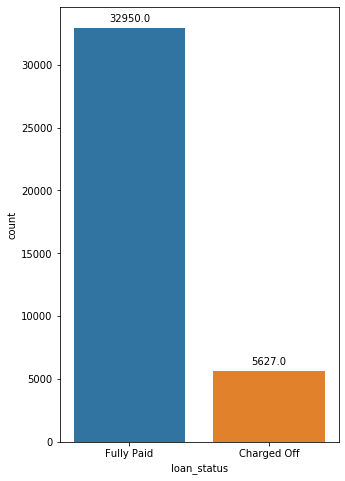

In [635]:
plt.figure(figsize=[5,8])
splot=sns.countplot(x= df["loan_status"])
add_labels(splot)

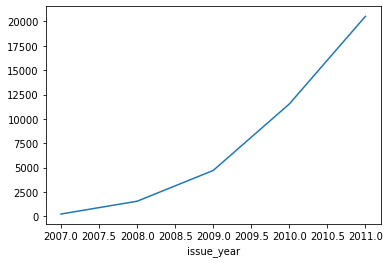

In [636]:
df.groupby('issue_year')['loan_status'].count().plot()
plt.show()

#### Analysis
    1. Most of the loans are Fully Paid.
    2. About 15%(5627 out of 38577) of loan are having status as defaulters.
    3. Loans issued is showing a raise over the years.

### Outlier Analysis using Box Plots

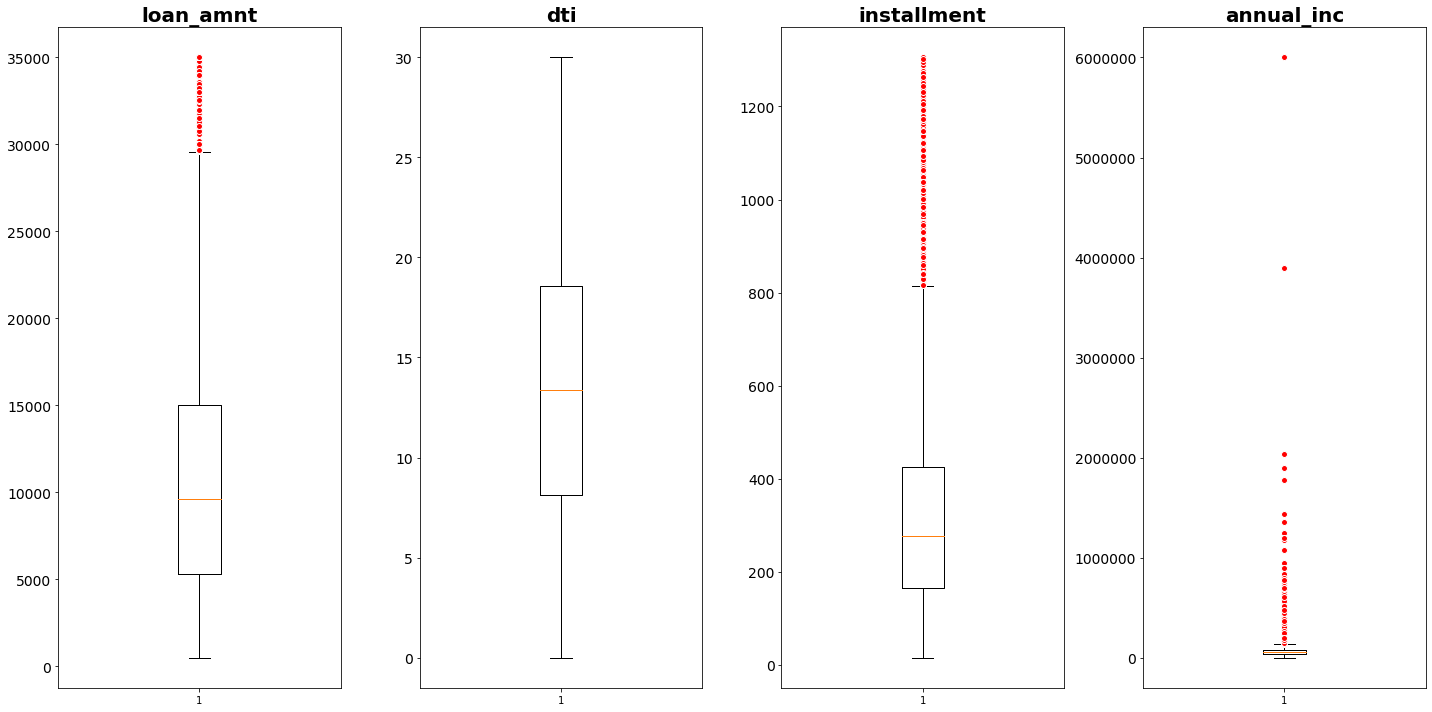

In [637]:
multi_box_plot(colList)

In [638]:
df[colList].describe()

,loan_amnt,dti,installment,annual_inc
count,38577.000000,38577.000000,38577.000000,3.857700e+04
mean,11047.025430,13.272727,322.466318,6.877797e+04
std,7348.441646,6.673044,208.639215,6.421868e+04
min,500.000000,0.000000,15.690000,4.000000e+03
25%,5300.000000,8.130000,165.740000,4.000000e+04
50%,9600.000000,13.370000,277.860000,5.886800e+04
75%,15000.000000,18.560000,425.550000,8.200000e+04
max,35000.000000,29.990000,1305.190000,6.000000e+06


### Outlier Treatment
    . We observe there are no outliers in case of 'dti'.
    . Outliers are present beyond the upper fence only for the columns 'loan_amnt','installment','annual_inc'.
    . No outliers present below the lower fence.

Outlier treatment is done by substituting all the outliers with the upper fence value.
i.e. Q3 + 1.5IQR

In [639]:
def outlier_treatment(df,colName):
    IQR = df[colName].quantile(0.75)-df[colName].quantile(0.25)
    UF = df[colName].quantile(0.75) + (1.5*IQR)
    df.loc[df[colName] > UF,colName]=UF

In [640]:
outlier_treatment(df,"loan_amnt")

In [641]:
outlier_treatment(df,"installment")

In [642]:
outlier_treatment(df,"annual_inc")

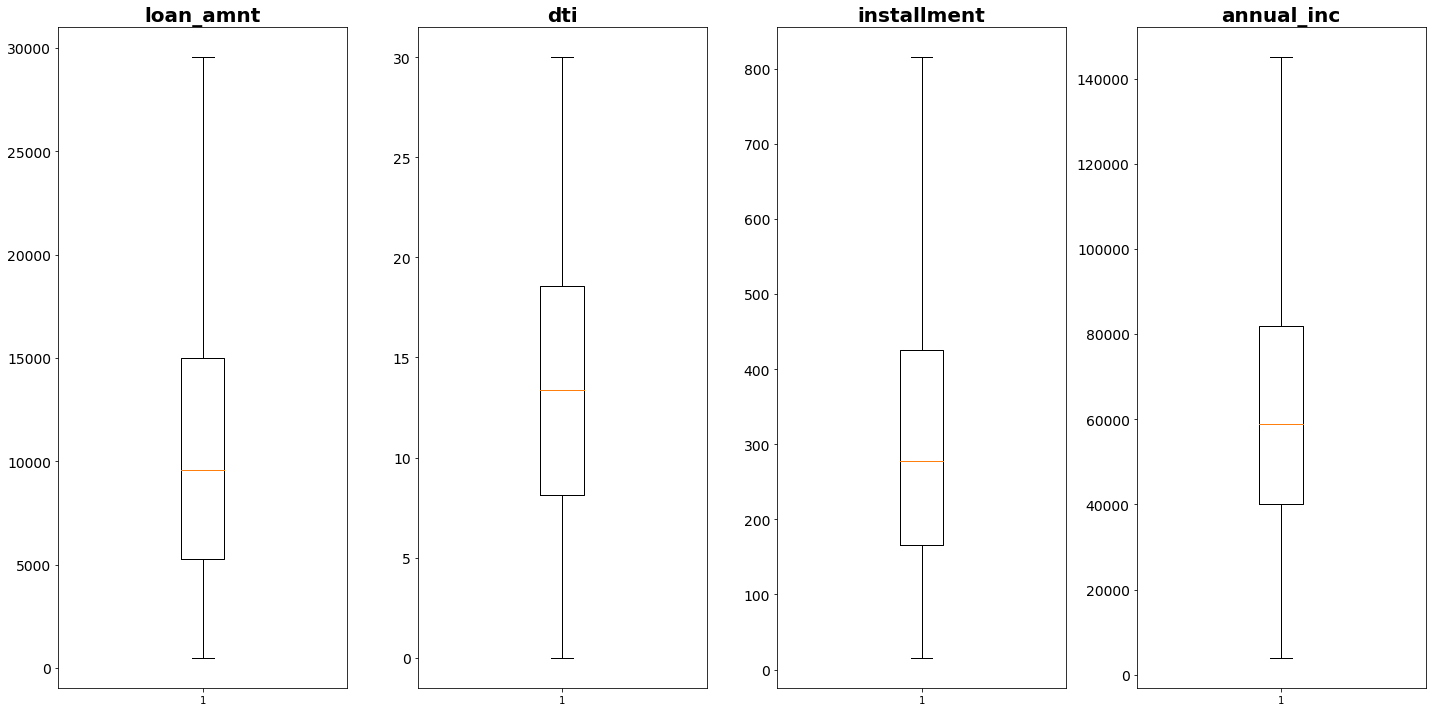

In [643]:
multi_box_plot(colList)

In [644]:
df[colList].describe()

,loan_amnt,dti,installment,annual_inc
count,38577.000000,38577.000000,38577.000000,38577.000000
mean,10947.966405,13.272727,318.767660,65044.917784
std,7058.665784,6.673044,197.579507,32652.937415
min,500.000000,0.000000,15.690000,4000.000000
25%,5300.000000,8.130000,165.740000,40000.000000
50%,9600.000000,13.370000,277.860000,58868.000000
75%,15000.000000,18.560000,425.550000,82000.000000
max,29550.000000,29.990000,815.265000,145000.000000


## Univariate & Segmented Univariate Analysis 
(** Will also see the distribution of each against target variable or loan_status)
### Quantitative or Numerical Columns

### loan_amt - Univariate Analysis
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

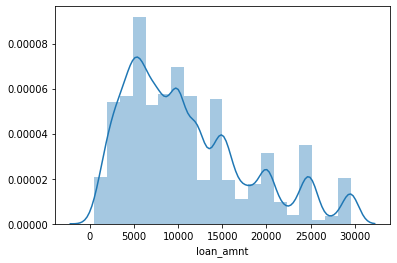

In [645]:
sns.distplot(df['loan_amnt'],bins=20)
plt.show()

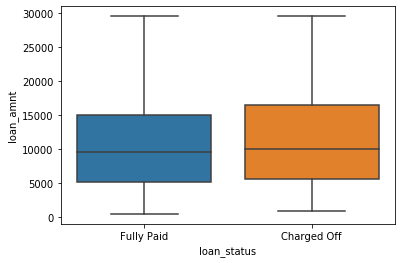

In [646]:
sns.boxplot(df["loan_status"],df['loan_amnt'])
plt.show()

#### Analysis
    . We see the max applications requesting for loan worth 5000.
    . There is a trend we can see that, there is increase in loan amount for every 5000.

#### Creating Derived Categorical Variable by Binning the 'loan_amt' column to perform Segmented Univariate Analysis

In [647]:
df['loan_amnt_cat'] = pd.cut(df['loan_amnt'], 
                    [x for x in range(0, 35000, 5000)], labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k'])

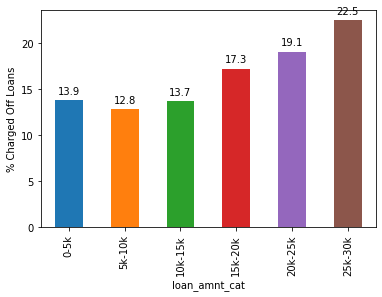

In [648]:
plotChargedOffPercentage(df, 'loan_amnt_cat')

#### Analysis
    . We observe an increase in loans getting defaulted with the increase in loan amount.

### annual_inc - Univariate Analysis
The self-reported annual income provided by the borrower during registration.

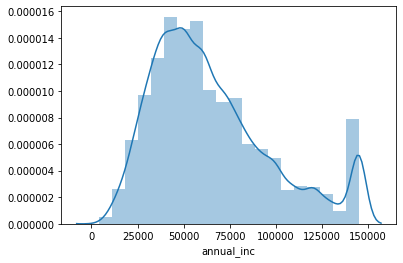

In [649]:
sns.distplot(df['annual_inc'],bins=20)
plt.show()

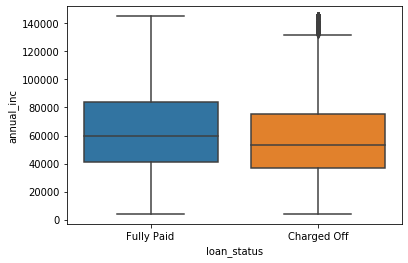

In [650]:
sns.boxplot(df["loan_status"],df['annual_inc'])
plt.show()

#### Analysis
    . Applicants with higher income tend to pay back the loan.
    . The spike at 150k is due to the outlier treatment we did earlier.

### dti - Univariate Analysis
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

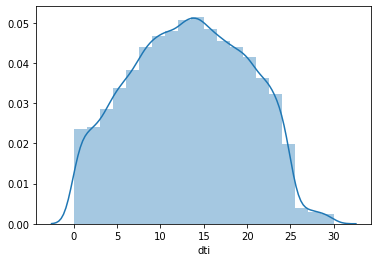

In [651]:
sns.distplot(df['dti'],bins=20)
plt.show()

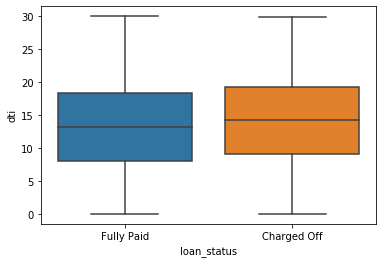

In [652]:
sns.boxplot(df["loan_status"],df['dti'])
plt.show()

#### Create derived variable and perform segmented univariate analysis

In [653]:
df['dti_cat'] = pd.cut(df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

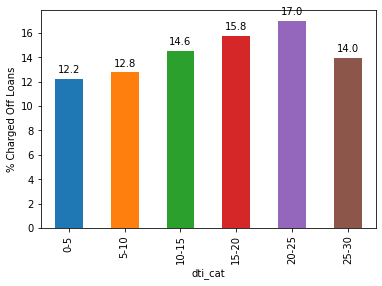

In [654]:
plotChargedOffPercentage(df, 'dti_cat')

#### Analysis
    With higher debt to income ratio, the risk of defaulting increases. We observe the highest percentage of defaulters in the bucket 20-25.

### installment - Univariate Analysis
The monthly payment owed by the borrower if the loan originates.

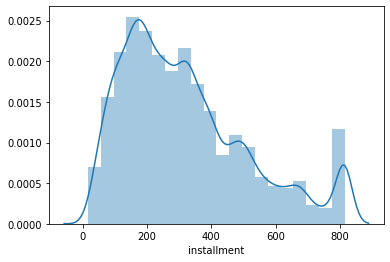

In [655]:
sns.distplot(df['installment'],bins=20)
plt.show()

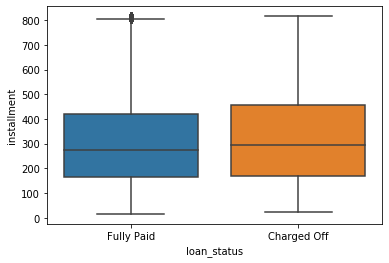

In [656]:
sns.boxplot(df["loan_status"],df['installment'])
plt.show()

#### Analysis
    Higher installments loans default comparatively more than the ones with lower installment.

## Univariate Analysis & Segmented Univariate Analysis
### Categorical Columns

### Grades
    LC assigned loan grade

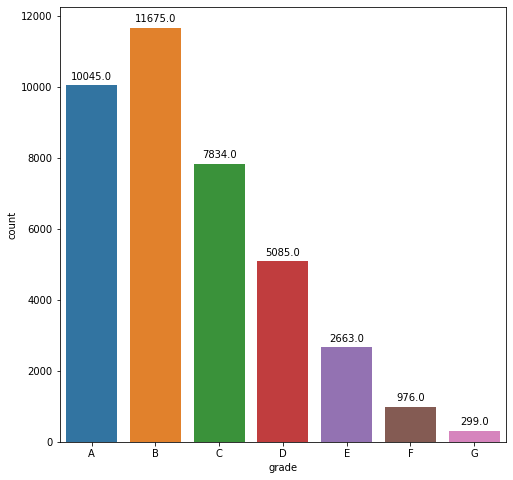

In [657]:
plt.figure(figsize=[8,8])
splot=sns.countplot(x='grade', data=df,order=['A','B','C','D','E','F','G'])
add_labels(splot)

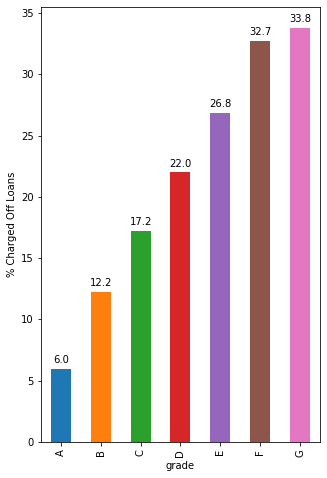

In [658]:
plt.figure(figsize=[5,8])
plotChargedOffPercentage(df, 'grade')


#### Analysis
    The loans with lower grades are risky, hence we observe most of the loans are given to A & B grade applicants.

### emp_length
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

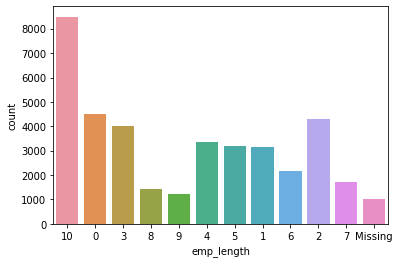

In [659]:
sns.countplot(df['emp_length'])
plt.show()

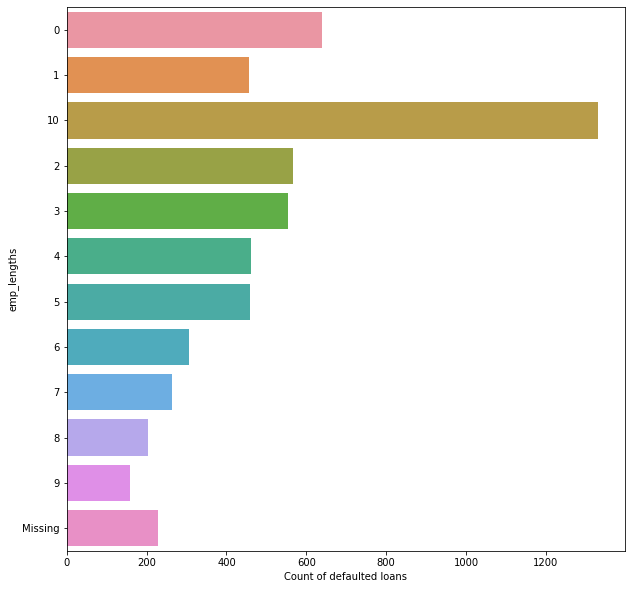

In [660]:
groupedData = df[df['loan_status']=='Charged Off'].groupby('emp_length')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
splt=sns.barplot(y='emp_length', x='loan_status', data=groupedData)
plt.xlabel('Count of defaulted loans')
plt.ylabel('emp_lengths')
plt.show()

#### Analysis
    . Maximum of loan applicants are from 10+ years group.
    . 10+ and 0 years group loan applicants default the most.

### addr_state
The state provided by the borrower in the loan application

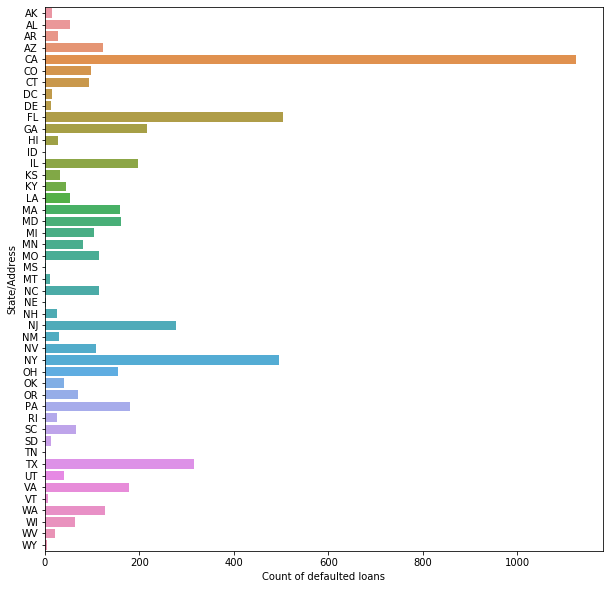

In [661]:
groupedData = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
splt=sns.barplot(y='addr_state', x='loan_status', data=groupedData)
plt.xlabel('Count of defaulted loans')
plt.ylabel('State/Address')
plt.show()

#### Analysis
    Applicants from CA(California) state followed by FL(Florida) and NY(New York) default more.


### pub_rec_bankruptcies
Number of public record bankruptcies

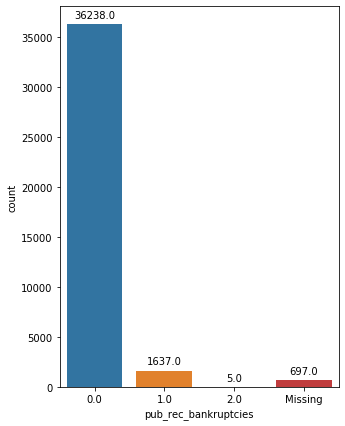

In [662]:
plt.figure(figsize=[5,7])
splot = sns.countplot(df['pub_rec_bankruptcies'])
add_labels(splot)

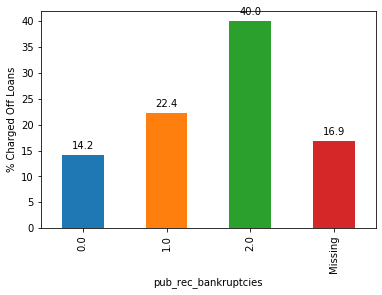

In [663]:
plotChargedOffPercentage(df, 'pub_rec_bankruptcies')

#### Analysis
    . Few applicants have been granted loan who had prior record of bankruptcies.
    . Amoung those applicants with prior record of bankruptcies the chances of defaulting is very high 
    as observed in the plot.

### verification_status
Indicates if income was verified by LC, not verified, or if the income source was verified

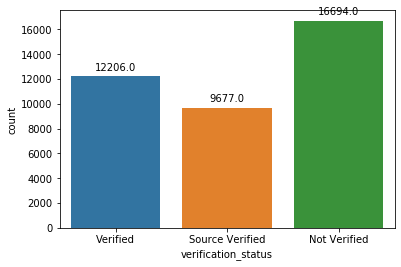

In [664]:
splot = sns.countplot(df['verification_status'])
add_labels(splot)

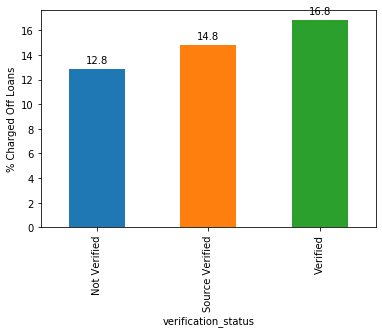

In [665]:
plotChargedOffPercentage(df, 'verification_status')

#### Analysis:
    . There are more number of Non Verified loans compared to the verified ones.
    . The verified loans have defaulted more compared to the non verified ones.

### home_ownership
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

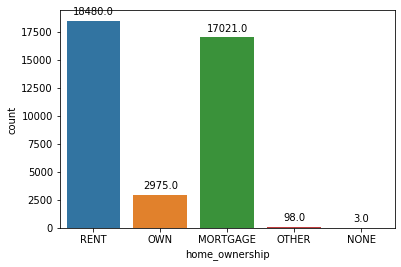

In [666]:
splot = sns.countplot(df['home_ownership'])
add_labels(splot)

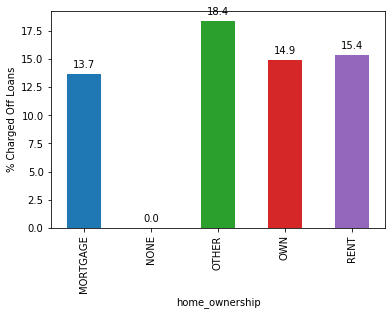

In [667]:
plotChargedOffPercentage(df, 'home_ownership')

#### Analysis:
    People with rented & mortgage flats have the maximum loans.

### purpose
A category provided by the borrower for the loan request. 

<Figure size 1080x216 with 0 Axes>

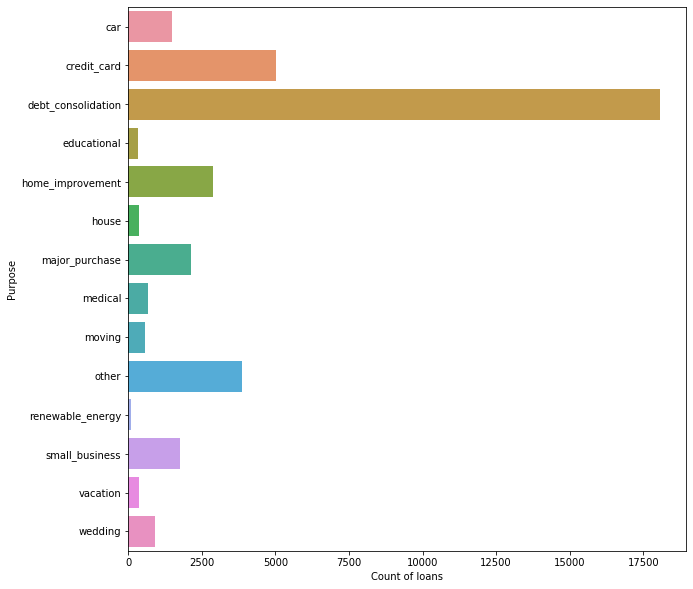

In [668]:
plt.figure(figsize=(15, 3))
groupedData = df.groupby('purpose')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
splt=sns.barplot(y='purpose', x='loan_status', data=groupedData)
plt.xlabel('Count of loans')
plt.ylabel('Purpose')
plt.show()

<Figure size 1080x216 with 0 Axes>

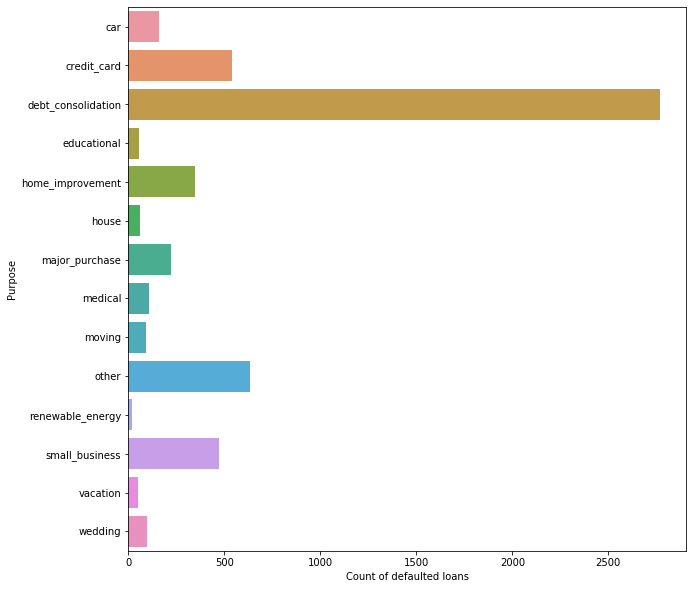

In [669]:
plt.figure(figsize=(15, 3))
groupedData = df[df['loan_status']=='Charged Off'].groupby('purpose')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
splt=sns.barplot(y='purpose', x='loan_status', data=groupedData)
plt.xlabel('Count of defaulted loans')
plt.ylabel('Purpose')
plt.show()

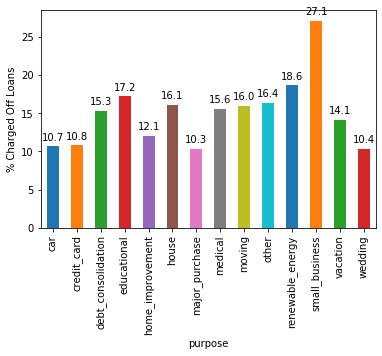

In [670]:
plotChargedOffPercentage(df, 'purpose')

#### Analysis:
    . Maximum loans have been given for debt consolidation
    . Maximum defaulters are those who have applied loan with the purpose of debt consolidation.

### term
The number of payments on the loan. Values are in months and can be either 36 or 60.

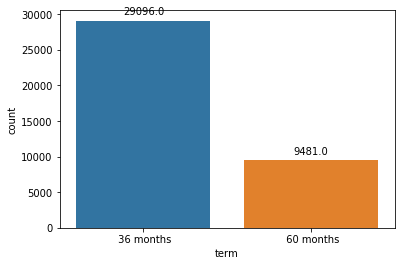

In [671]:
splot = sns.countplot(df['term'])
add_labels(splot)

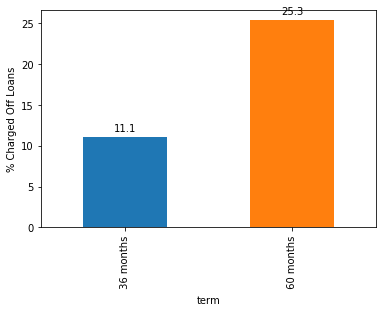

In [672]:
plotChargedOffPercentage(df, 'term')

#### Analysis:
    . People with shorter term get more loans.
    . People with higher loan term tend to default more.

### int_rate
Interest Rate on the loan

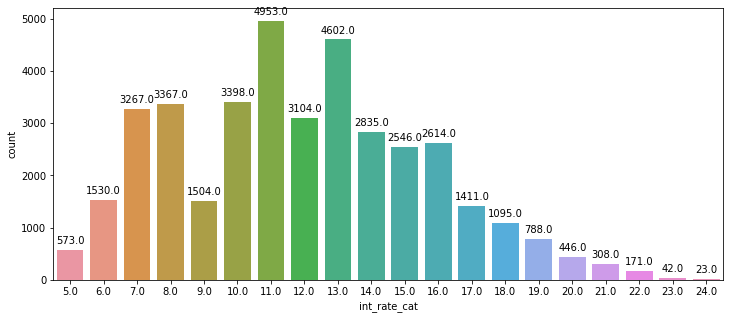

In [673]:
plt.figure(figsize=(12,5))
splot = sns.countplot(df['int_rate_cat'])
add_labels(splot)

<Figure size 864x360 with 0 Axes>

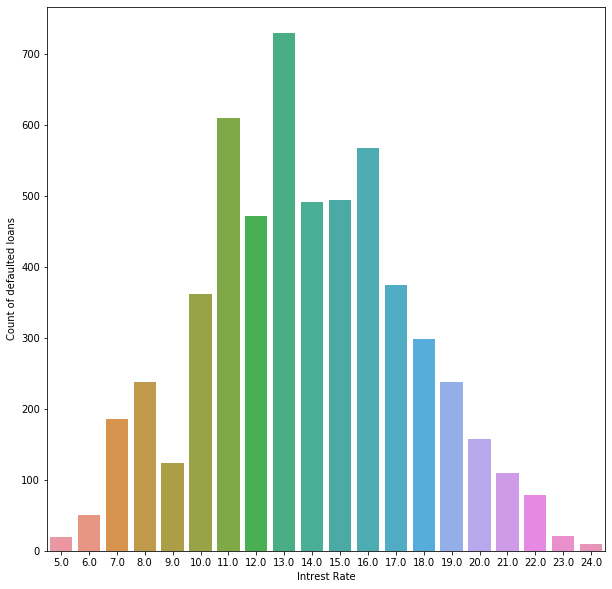

In [674]:
plt.figure(figsize=(12,5))
groupedData = df[df['loan_status']=='Charged Off'].groupby('int_rate_cat')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
splt=sns.barplot(y='loan_status', x='int_rate_cat', data=groupedData)
plt.ylabel('Count of defaulted loans')
plt.xlabel('Intrest Rate')
plt.show()

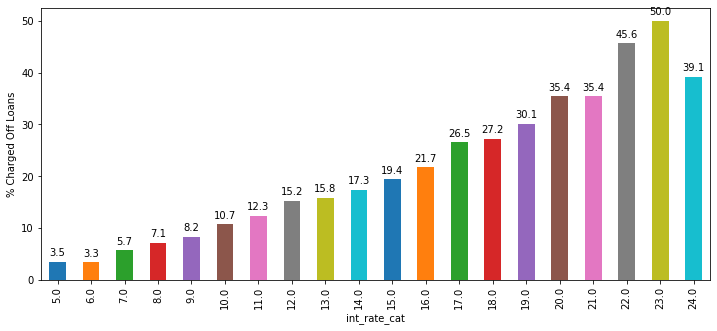

In [675]:
plt.figure(figsize=(12,5))
plotChargedOffPercentage(df, 'int_rate_cat')

#### Analysis:
    . With increase in intrest rate the defaulters also increase.

### issue_d - issue_month & issue_year
The month which the loan was funded

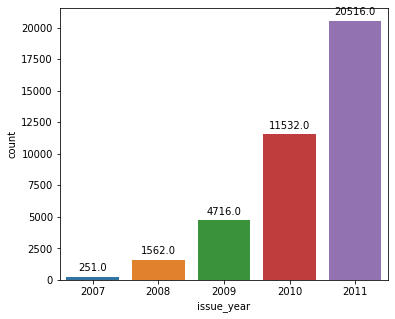

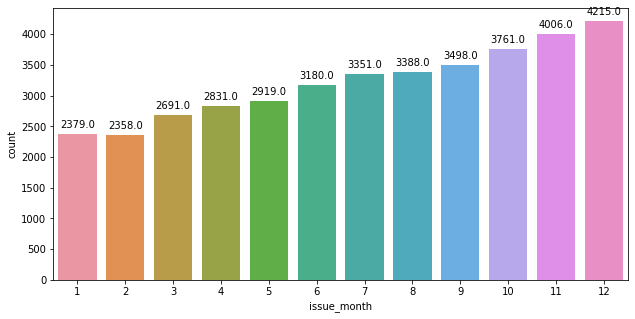

In [676]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
splot=sns.countplot(df['issue_year'], order=sorted(df.issue_year.unique()))
add_labels(splot)

plt.figure(figsize=(35,5))
plt.subplot(1, 3, 2)
splot=sns.countplot(df['issue_month'], order=sorted(df.issue_month.unique()))
add_labels(splot)

<Figure size 864x360 with 0 Axes>

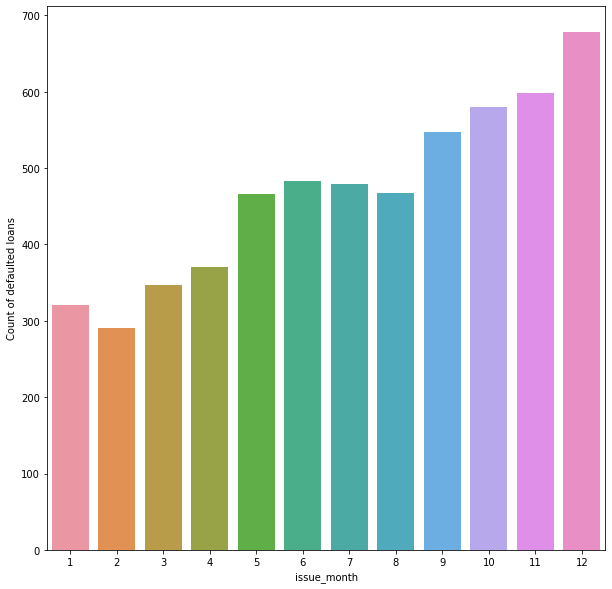

In [677]:
plt.figure(figsize=(12,5))
groupedData = df[df['loan_status']=='Charged Off'].groupby('issue_month')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
splt=sns.barplot(y='loan_status', x='issue_month', data=groupedData)
plt.ylabel('Count of defaulted loans')
plt.xlabel('issue_month')
plt.show()

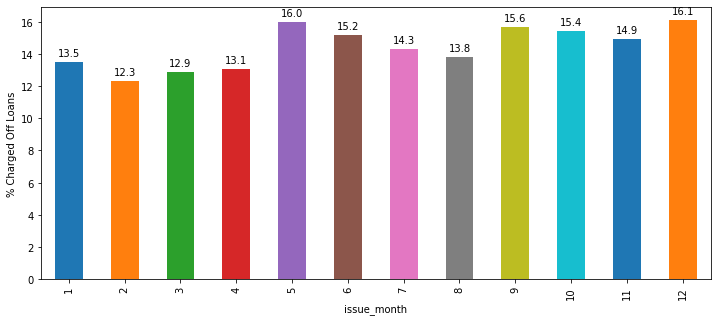

In [678]:
plt.figure(figsize=(12,5))
plotChargedOffPercentage(df, 'issue_month')

#### Analysis

    . Year by year the loan counts have increased.
    . We observe an increase in loan towards the end of year.
    . The number of loans defaulting also increase towards the end of year. Default percentage being highest in December.

## Bivariate Analysis

### loan_amnt & annual_inc

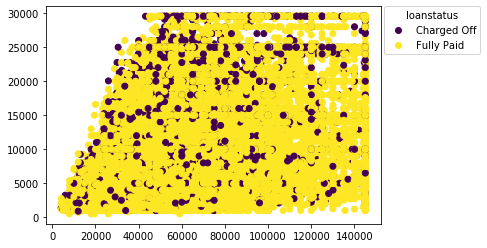

In [679]:
status = ['Charged Off','Fully Paid']
scatter=plt.scatter(y=df['loan_amnt'],x=df['annual_inc'],c=df['loan_status'].astype('category').cat.codes)
plt.legend(handles=scatter.legend_elements()[0], labels=status,
           title="loanstatus",bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()


#### Analysis
    . People asking for loans with lower income to loan ratio are risky
    . We observe the high loans with lower incomes have charged off more.

### loan_amnt & grades

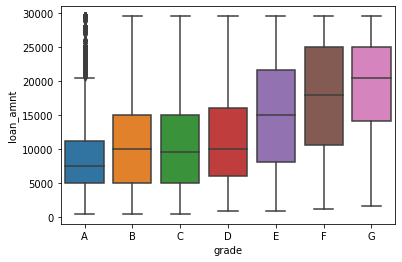

In [680]:
sns.boxplot(df.grade,df.loan_amnt,order=['A','B','C','D','E','F','G'])
plt.show()

#### Analysis
    We observe a continious increase in loan amount for lower grades.

### annual_inc & grades

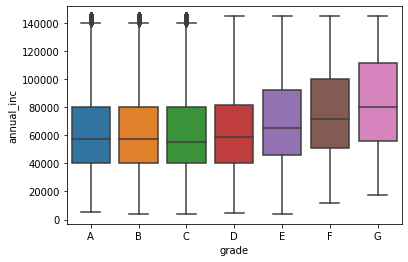

In [681]:
sns.boxplot(df.grade,df.annual_inc,order=['A','B','C','D','E','F','G'])
plt.show()

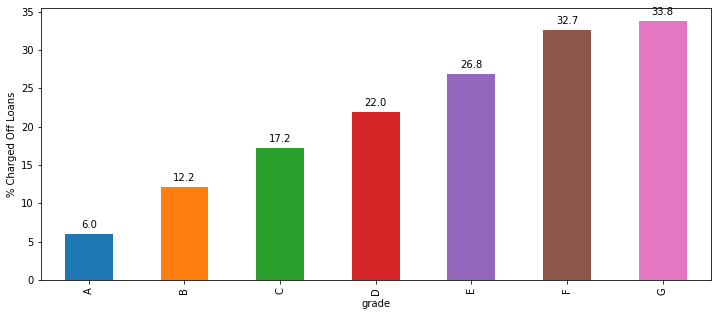

In [682]:
plt.figure(figsize=(12,5))
plotChargedOffPercentage(df, 'grade')

#### Analysis
    . We observe a continious increase in loan amount for lower grades.
    . Lower grades have higher percentage of defaulters.

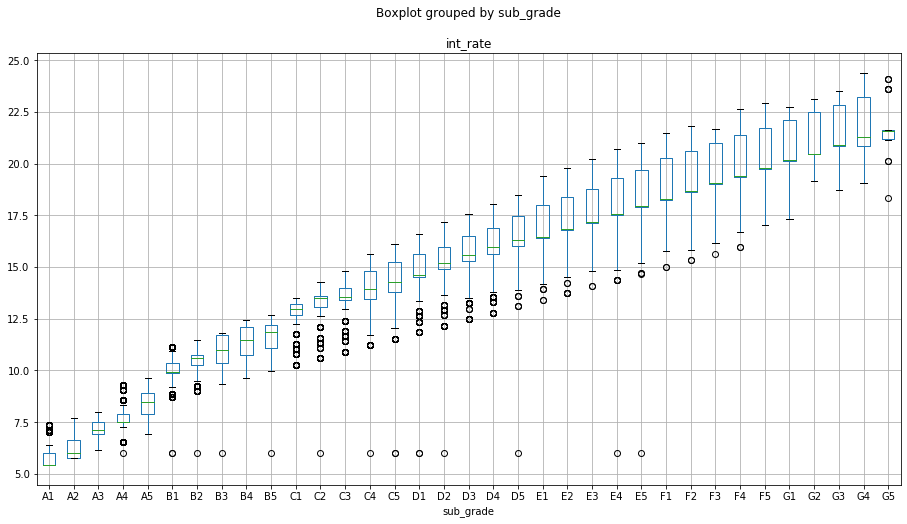

In [683]:
df.boxplot(column='int_rate', by='sub_grade',figsize=(15,8))
plt.show()

#### Analysis
    We observe an increase in intrest rates for higher or riskier grades.

### loan_amnt & issue year

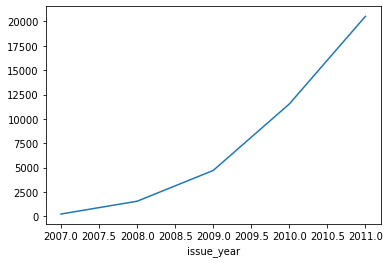

In [684]:
df.groupby('issue_year')['loan_amnt'].count().plot()
plt.show()

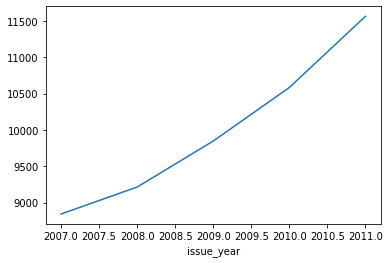

In [685]:
df.groupby('issue_year').loan_amnt.mean().plot()
plt.show()

#### Analysis
    We observe an increase in loan amount over the years.

### loan_amnt & int_rate

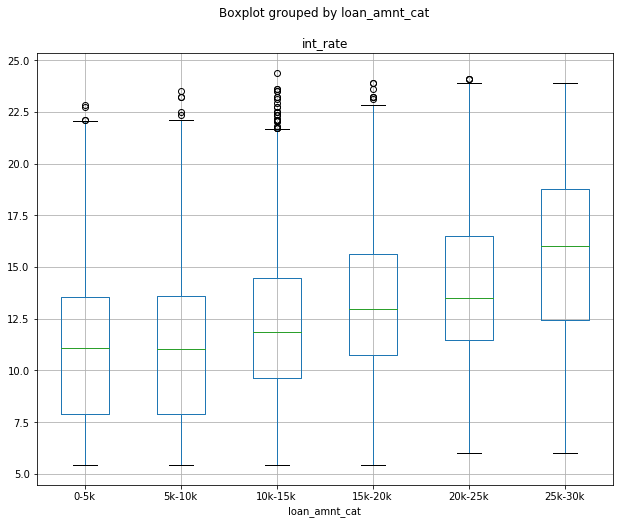

In [686]:
df.boxplot(column='int_rate', by='loan_amnt_cat',figsize=(10,8))
plt.show()

#### Analysis
    Higher loan amounts have higher intrest rates.

### int_rate & term

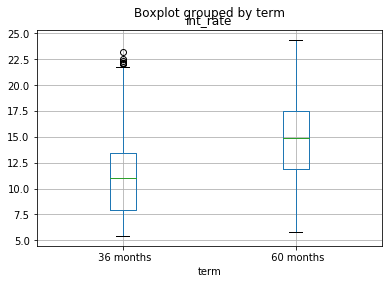

In [687]:
df.boxplot(column='int_rate', by='term')
plt.show()

#### Analysis
    Intrest Rates for loans having higher term is more.

### Grade & Annual Income

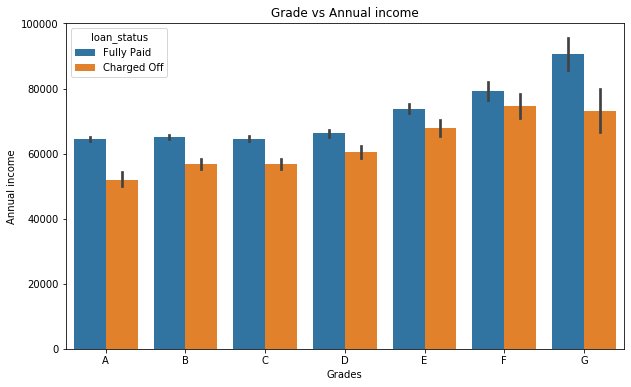

In [688]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=df, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income')
ax.set_ylabel('Annual income')
ax.set_xlabel('Grades')
plt.show()

#### Analysis
    From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones who'paid fully' 
    for each and every grade (i.e. at same grade range)

### loan_amnt vs verification_status vs loan status

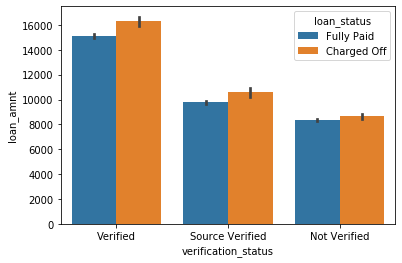

In [689]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
plt.show()

#### Analysis
    . Loans with higher amounts are often verified.

### Loan amount vs Grade vs Term

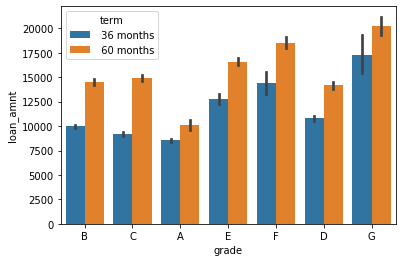

In [690]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=df, estimator=np.mean)
plt.show()

#### Analysis
    We observe higher loan amounts have higher terms especially for riskier grades.

### Loan amount Vs term Vs Loan Status

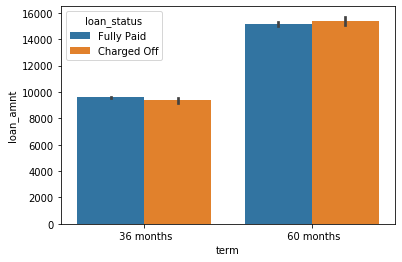

In [691]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
plt.show()

#### Analysis
    We observe, higher loan amounts have higher terms get defaulted more.

### Multivariate Analysis - All Numerical Variables

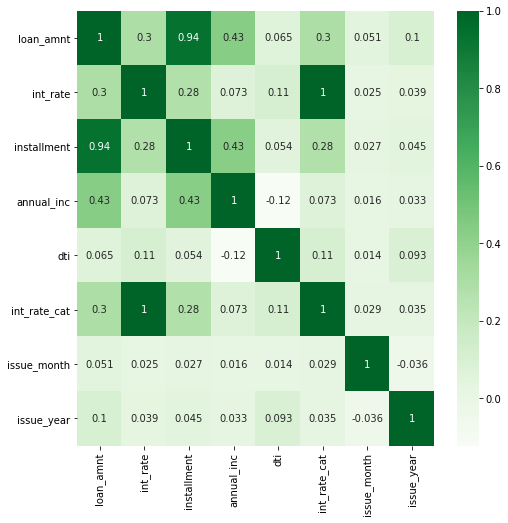

In [692]:
plt.figure(figsize=(8,8))
corr = df.corr()
sns.heatmap(corr, annot=True, center=0.5,cmap='Greens')
plt.show()

#### Analysis
    There's a high positive correlation between loan amount and installments i.e. higher loan amounts have higher 
    installments